The first thing that was required to begin this journey of sentiment analysis was to obtain the following fundamental python libraries: NLTK, string, spaCy, re, Panda, Matplotlib, TextBlob, VADER, Flair, along with their modules.

In [71]:
#Dependencies
import nltk
import string
import spacy
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence

In order to begin, I would like to analyze the sentiment expressed by the headings of my 30 corpus regarding beauty standards of women. Hence, to achieve this, I accessed the meta data of my corpus, which consists of the title of each corpus as well as the sources of the articles, the dates of publication, the names of the editors arranged in a structured manner within the meta data. This csv file was opened using Pandas, a powerful Python library for reading and writing files including csv and excel. Using df.head(), it returns the first 5 rows of the dataframe.

In [54]:
# Working with titles of article at first
df = pd.read_csv(r"C:\\Users\\sukan\\Compsub\\Metadata.csv", encoding = "utf-8")
df.head(5)

,Source,Date,Editor,Title,Site
0,FASHION JOURNAL,"May 03,2022",HANNAH COHEN,A plastic surgeon on the most in-demand cosmet...,NaN
1,INTERNATIONAL THE NEWS,"January 09, 2022",Web Desk,Ashley Graham hits back against society's acce...,https://www.thenews.com.pk/latest/923875-ashle...
2,FEMINA,"August 17, 2021",Eden Noronha,Beauty Activism Has Empowered So Many People T...,https://www.femina.in/beauty/make-up/protestin...
3,TECHNOLOGY REVIEW,"April 2, 2021",Tate Ryan-Mosleyarchive,Beauty filters are changing the way young girl...,https://www.technologyreview.com/2021/04/02/10...
4,egypt today,"Feb 05, 2018",Maram Boghdady,Beauty standards around the world,https://www.egypttoday.com/Article/6/41942/Bea...


Any title that is used to describe a piece of writing also carries a significant meaning and sentiment. Due to this, I decided to treat these titles as data and created a variable called 'tdata', which is an abbreviation for title data, in order to work with them. In this entire csv file, the only column we actually require is 'Title'; therefore, I accumulated all the data inside this particular column into a list and later converted that list into a string type in order to make it more convenient to use.

In [55]:
# texts(data) inside Title column has been taken
tdata = df.Title.values.tolist()
tdata=' '.join(tdata) # converting title data as string

Recent years have seen an increase in sentiment analysis, emotion classification and sarcasm detection because of the abundance of user-generated data, accurate linguistic models, and a variety of relevant applications. Numerous studies have recognized that text preprocessing is a critical component of prediction models and downstream operations in natural language processing. In recent years, there has been an abundance of studies showing that preprocessing can improve the accuracy performance when it comes to tasks such as word similarity, word analogy, and others (Lison and Kutuzov, 2017). It is unfortunate that their effect in affective tasks has not received a great deal of attention and remains relatively unexplored (Babanejad, .Agrawal, An &  Papagelis 2020). Although lots of preprocessing factors are present in almost every improved text classification model, and affective systems in particular, such as stemming, stopwords removal, and so on (Danisman and Alpkocak 2008; Patil and Patil, 2013), preprocessing factors are essential. 

The Clean and Removing Noise feature helps to find and eliminate unhelpful parts of the data as well as removing punctuation marks, stop words, and typing errors that are present in the data. The feature converts all characters to lowercase, removes punctuation marks, and removes stop words. While it might be overlooked, the simplest and most effective method of preprocessing text is by lowercasing all of your text data. Generally, it is applicable to most text mining and natural language processing problems. It also contributes significantly to maintaining consistency in the outputs. There are a number of stop words in English, including "a", "the", "is", "are" and so on. By eliminating low-information words from the text, stop word removal enables us to focus on the key words(https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html).

In order to proceed with the preprocessing, I converted all words in texts to lower case so that the computer would not be confused by "BEAUTY", "Beauty", "beauty", etc., so that the output would be the same for each of these words despite the variation of their letter cases. After that, I removed all punctuation. Afterwards, tokenization takes place. In this way, a string (text document) is immediately transformed into a numerical data structure that can be used for machine learning. Additionally, a computer can use them directly to trigger useful actions and responses. It is also possible to use them in a machine learning pipeline as features that trigger more complex decisions or behaviors. Contextual embedding models, including transformer-based ones (Vaswani et al., 2017) and BERT (Devlin et al., 2018), often require tokenization to solve problems such as out-of-vocabulary issues.

Following the removal of punctuation from the text, we attempted to determine the length of the raw text, the length of data after removing punctuation, and the length of tokens and data after removing stopwords, respectively, and obtained the values 2316, 2263, 371, and 231.


In [56]:
# Preprocessing of title data
tdata_low = tdata.lower() # lower case
tdata_punc = tdata_low.translate(str.maketrans('', '', string.punctuation)) # Removing Punctuation
tdata_token = word_tokenize(tdata_punc, "english") # Tokenization
tdata_stop_removed = [] # Stop word removing in for loop method 
for word in tdata_token:
    if word not in stopwords.words('english'):
        tdata_stop_removed.append(word)
print(len(tdata))
print(len(tdata_punc))
print(len(tdata_token))
print(len(tdata_stop_removed))

2316
2263
371
231


Data derived after removing stopwords is contained in a list but some function requires data in string format to work on so with .join function I converted list into a string.

In [57]:
# Converting tokens and stop words removed data as string
#tdata_token = ' '.join(tdata_token)
tdata_stop_removed = ' '.join(tdata_stop_removed)

Due to the fact that I have preprocessed my data so that I may begin the actual task, I decided to utilize lexicon-based sentiment analysis. This is because the titles of my corpus are relatively short compared to the whole texts of my entire corpus. In the first instance, I intended to create two lists consisting of positive and negative words only from the MPQA corpus obtained from the subjectivity file. Based on the relation between the word and its polarity, these two lists are compiled, labelled as pos_words and neg_words. A negative polarity means that words will be appended to the negative list, and a positive polarity means that words will be appended to the positive list. https://github.com/raaga500/YTshared/blob/master/V7_SentimentAnalysis.ipynb. Length of positive and nagative words are 2718 and 4911 respectively.

In [58]:
# Creating Positive & Negative word dictionary created from University of Pittsburgh MPQA corpus
#http://mpqa.cs.pitt.edu/lexicons/subj_lexicon/
pos_words = []
neg_words = []

#Ignoring neutral, both, and other polarities
with open("C:\\Users\\sukan\\Downloads\\subjectivity_clues_hltemnlp05 (1)\\subjectivity_clues_hltemnlp05\\subjclueslen1-HLTEMNLP05.tff") as file:
    for line in file:
        line_attrib = line.split()
        word = line_attrib[2].split('=')[1] #2nd column in the file
        polarity = line_attrib[-1].split('=')[1] #last column in the file
        if polarity =='positive':
            pos_words.append(word)
        elif polarity=='negative':
            neg_words.append(word)
            
print('Total positive words found: ',len(pos_words))
print('Total negative words found: ',len(neg_words))

#Write results to file for future use
#with open('pos_words.txt', mode='wt', encoding='utf-8') as myfile:
#    myfile.write('\n'.join(pos_words))
#with open('neg_words.txt', mode='wt', encoding='utf-8') as myfile:
#    myfile.write('\n'.join(neg_words))

Total positive words found:  2718
Total negative words found:  4911


Using the MPQA lexicon, I have manually added some positive and negative terms which are present in the title data but not present in the MPQA lexicon, so that I can analyze the sentiment more accurately. Now the length of postive and negative words are 2729, 4940 respectively.

In [59]:
# Adding some positive and negative words present in title data but absent in MPQA lexicon
pos_word_add = ['decolonize','decolonizing','decolonizes','decolonized','grow','growing','grown','grew','clean','cleaning','cleaned']
for term in pos_word_add:
    pos_words.append(term)

neg_word_add = ['plastic','plastic surgery','surgery','cosmetic surgery','cosmetic procedures','filter','filters','impose','imposed','troll','trolling','deadliest','deadly','ugly','poor','unattainable','beauty filters','destroy','destroys','destroying','destroyed','scam','scammer','fallacy','fallacies','augmented reality','hits','hitting','policing']
for term in neg_word_add:
    neg_words.append(term)
    
print('Total positive words found: ',len(pos_words))
print('Total negative words found: ',len(neg_words))

Total positive words found:  2729
Total negative words found:  4940


Now with the help of updated positive and negative lsits I tried to determine how many positive or negative words my titles of corpus contain. 42 positive words, 61 negative words are found. Just to determine that I created these two lists.

In [60]:
# Number of positive words found in title data
pos_words_title = []
for word in pos_words:
    if word in tdata_stop_removed:
        pos_words_title.append(word)
print(len(pos_words_title))

42


In [61]:
# Number of negative words found in title data
neg_words_title = []
for word in neg_words:
    if word in tdata_stop_removed:
        neg_words_title.append(word)
print(len(neg_words_title))

61


In the next step, we need to define a function that will give a sentiment score of +1 whenever a positive word (according to the updated MPQA positive list) word is found, as well as -1 for negative words. Since numbers of negative words weigh mor than positive words it was almost determined that overall sentiment score is going to be negative.

In [62]:
# Creating function to calculate sentiment based on word-dictionary
def calc_sentiment_based_on_word_dict(tdata_stop_removed):
    sentiment_score = 0
    words =nltk.word_tokenize(tdata_stop_removed)
     
    for word in words:
        if word in pos_words:
            print('pos:',word)
            sentiment_score=sentiment_score+1
        if word in neg_words:
            print('neg:',word)
            sentiment_score=sentiment_score-1
    return sentiment_score/len(words)

In [63]:
sentiment = calc_sentiment_based_on_word_dict(tdata_stop_removed)
print('The sentiment score of this text is: {:.2f}'.format(sentiment) )

neg: plastic
neg: hits
pos: back
pos: beauty
pos: beauty
pos: truth
pos: beauty
neg: filters
neg: widespread
neg: filters
pos: beauty
pos: beauty
neg: imposed
pos: impress
pos: beauty
pos: perfect
neg: fallacy
pos: beauty
neg: differ
pos: clean
pos: beauty
pos: growing
pos: celebrated
neg: sorry
neg: scam
pos: beauty
neg: filters
neg: destroy
pos: beauty
pos: beauty
neg: unattainable
neg: ugly
neg: poor
pos: beauty
neg: divide
neg: unrealistic
pos: beauty
neg: fell
pos: perfect
neg: crazy
pos: beauty
neg: dangerous
neg: damaging
neg: deadliest
pos: decolonizing
pos: beauty
pos: beauty
neg: dangerous
neg: differ
neg: unrealistic
neg: damaging
pos: beauty
neg: unrealistic
pos: beauty
neg: damage
neg: toxic
pos: beauty
neg: surgery
pos: ready
neg: toxic
pos: beauty
neg: trolling
neg: policing
pos: beauty
The sentiment score of this text is: -0.01


Semantic orientation and intensity define sentiments in lexicon-based approaches. A dictionary helps classify positive and negative words. Typically, text messages consist of words. Once all the words have been assigned individual scores, the final sentiment is calculated through some pooling operation, such as taking an average over all the scores.
An expression's polarity and subjectivity are returned by TextBlob. A negative sentiment is defined by -1, whereas a positive sentiment is defined by +1. Negation words reverse the polarity. In terms of subjectivity, there is a range between [0,1]. The concept of subjectivity refers to the amount of personal opinion as well as factual information contained within a text. A text with a high subjectivity contains more opinion than factual information. Intensity is another parameter in TextBlob. Based on 'intensity', TextBlob calculates subjectivity. Intensity determines whether it modifies the next one. For English, adverbs are used as modifiers eg . ‘very good’. In the event that the library returns exactly 0, either because your sentence does not contain any words with polarity in the NLTK training set or because TextBlob uses a weighted average sentiment score across all of the words in a sample. This effectively diffuses the effects of sentences with widely varying polarities between words. TextBlob works well in simple cases (Parthvi Shah 2020).https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
There are two sentiment analysis implementations in textblob.sentiments: PatternAnalyzer (based on the pattern library) and NaiveBayesAnalyzer (based on NLTK classifiers trained on movie reviews). TextBlob's default analyzer is PatternAnalyzer, but one can override it by passing a different implementation into the constructor. As an example, the NaiveBayesAnalyzer returns the following namedtuple: Sentiment(classification, p_pos, p_neg).https://textblob.readthedocs.io/en/dev/advanced_usage.html

Here I applied TextBlob to analyse sentiments of cleaned title data. First I applied default method and as a result polarity scores 0.0036036036036036015 and subjectivity scores 0.46756756756756757. It was expected to have lower polarity while the subjectivity is quite fair since titles are advocating some sort of facts instad of opinions. When NaiveBayes implementation is used classification came out to be positive but p_neg came higher than p_pos. Even p_neg scored higher than 1. 

For whole corpus, in default method (Pattern analyzer) and in NaiveBayes method the result is- polarity=0.09520467951620723, subjectivity=0.45448763724838676 and classification='pos', p_pos=1.0, p_neg=0.0 respectively. So the whole text of my corpus is  classified as positive. TextBlob fails here according to my expectation.

In [64]:
# TextBlob
blob = TextBlob(tdata_stop_removed)
blob.sentiment

Sentiment(polarity=0.0036036036036036015, subjectivity=0.46756756756756757)

In [65]:
blob = TextBlob(tdata_stop_removed, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9999999999999212, p_neg=1.059463251062522e-13)

A lexicon and rules-based sentiment analysis tool, Valence Aware Dictionary and Sentiment Reasoner (VADER), focuses on social media sentiment. Social media is a domain in which the VADER lexicon performs exceptionally well. “The correlation coefficient shows that VADER (r = 0.881) performs as well as individual human raters (r = 0.888) at matching ground truth (aggregated group mean from 20 human raters for sentiment intensity of each tweet). Surprisingly, when we further inspect the classification accuracy, we see that VADER (F1 = 0.96) actually even outperforms individual human raters (F1 = 0.84) at correctly classifying the sentiment of tweets into positive, neutral, or negative classes.” file:///C:/Users/sukan/Downloads/14550-Article%20Text-18068-1-2-20201228.pdf

It is possible to intensify the readers' sentiment with the addition of an exclamation mark at the end of a sentence, capitalization, or degree modifiers in a sentence. Conjunctions such as "but", slang, and emoticons can also influence our emotions. VADER takes all of these factors into account when analyzing sentiment. https://www.youtube.com/watch?v=Alu_cCXNS-k&t=604s

Since punctuation cannot pose as a big problem I chose the lower case version of raw texts. I receive these following results: negative sentiment 86%, neutral semtiment 66% and positive sentiment 25% . Surprisingly the result is quite accurate.

When VADER is applied on the whole text the result is bit shocking -'neg': 0.085, 'neu': 0.711, 'pos': 0.204, 'compound': 1.0.
Neutral sentiment of whole text is 71% but positivity is 20% while negativity is 9%. Positive sentiment is greater than the negative one.

In [50]:
# VADER
analyzer = SentimentIntensityAnalyzer() 
vs = analyzer.polarity_scores(tdata_low)
print(vs)

{'neg': 0.086, 'neu': 0.66, 'pos': 0.254, 'compound': 0.9979}


"The Flair Embedding is based on the concept of contextual string embeddings""Flair you can also combine different word embeddings together to get better results."https://www.geeksforgeeks.org/flair-a-framework-for-nlp/
As a result of Flare's simple mechanism, users are able to use and combine different word and document embeddings, as well as analyze and tell how the speakers are feeling based on the corpus of words and documents. As opposed to other NLP packages, flair's sentiment classifier uses a character-level LSTM neural network in which letter and word sequences are taken into account when predicting the sentiment. However, it also predicts sentiment for OOV (Out of Vocabulary) words, including typos, based on the corpus of words.https://christineeeeee.com/posts/nlp_sentiment_tool/

The result I obtained using Flair library is fairly good. The titles of the articles together are considered to be 'NEGATIVE' with 98%.

Unlike other libraries, Flair calculated whole corpus as 'Negative' with 98%


In [27]:
# Flair
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(tdata_stop_removed)
classifier.predict(sentence)
sentence.labels[0].score

2022-09-28 19:29:53,627 loading file C:\Users\sukan\.flair\models\sentiment-en-mix-distillbert_4.pt


0.9832104444503784

In [28]:
sentence.labels[0].value

'NEGATIVE'

It is possible to visualize the frequency of tokens within and across corpora by using frequency distribution. Frequency distributions provide information about the frequency of vocabulary items within a text. They can count any observable event. The distribution tells us how the total number of word tokens across all vocabulary items is distributed within the text. Having wanted to show what words are repeated most often in positive and negative word list of copurs title, I calculated the distribution of the word frequencies to show which of the words are repeated most frequently. I was surprised to find that in titles of the corpus, the word 'perfect', 'anger', 'lie' are most frequently repeated (3 times).

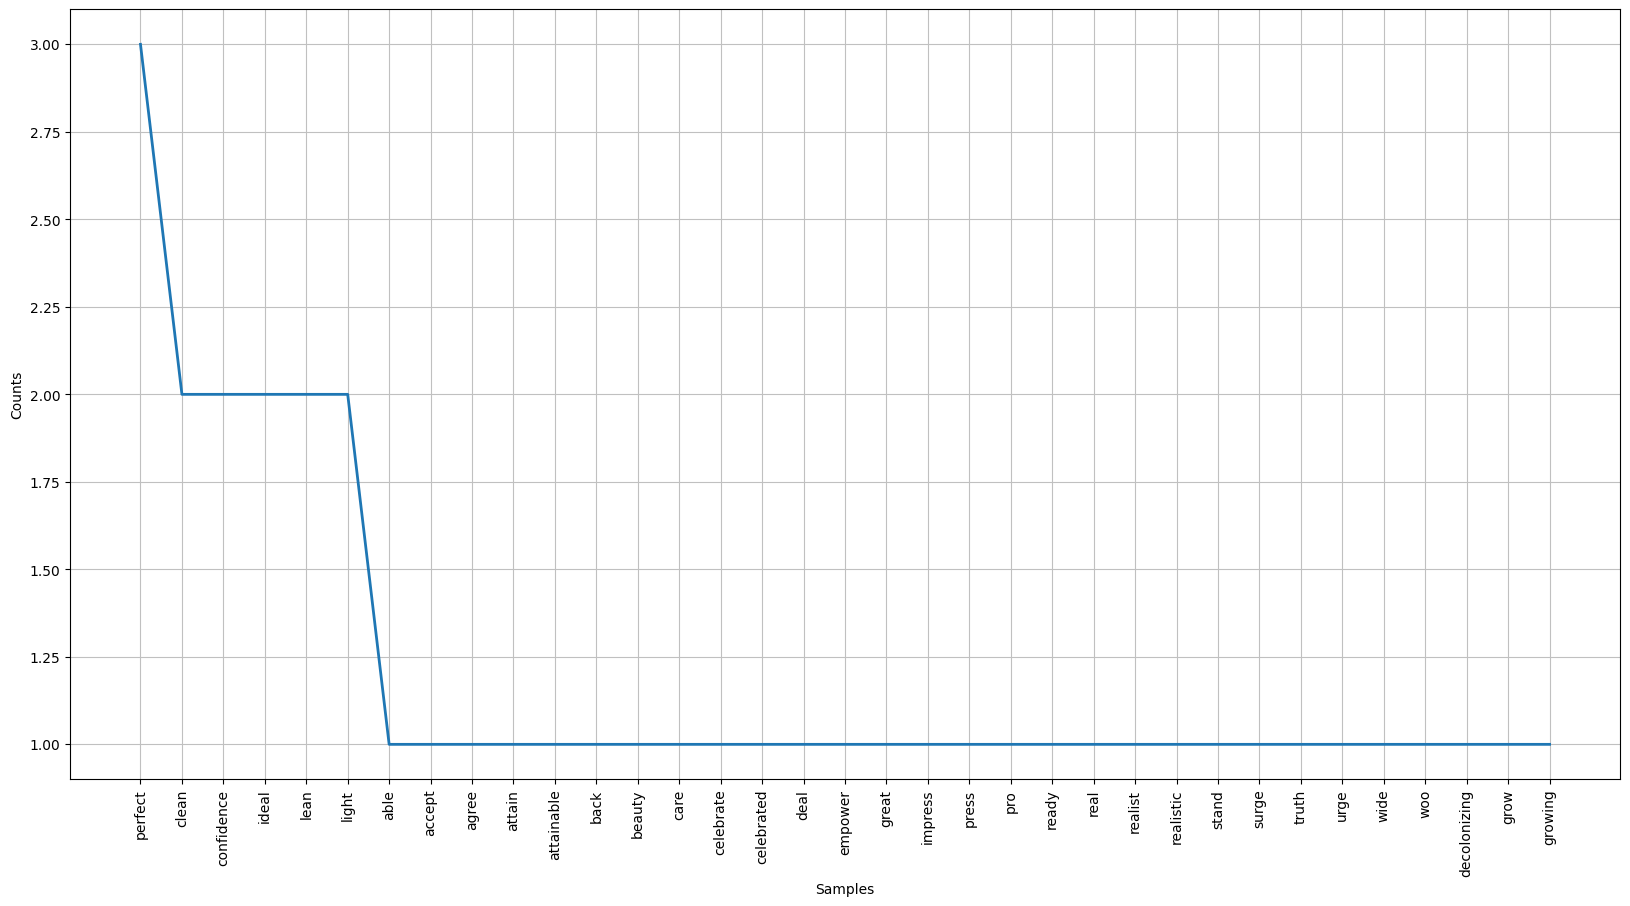

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
# Frequency distribution of positive words in title data
pos_fd = FreqDist(pos_words_title)
fig, ax = plt.subplots(figsize= (20,10))
pos_fd.plot(35)

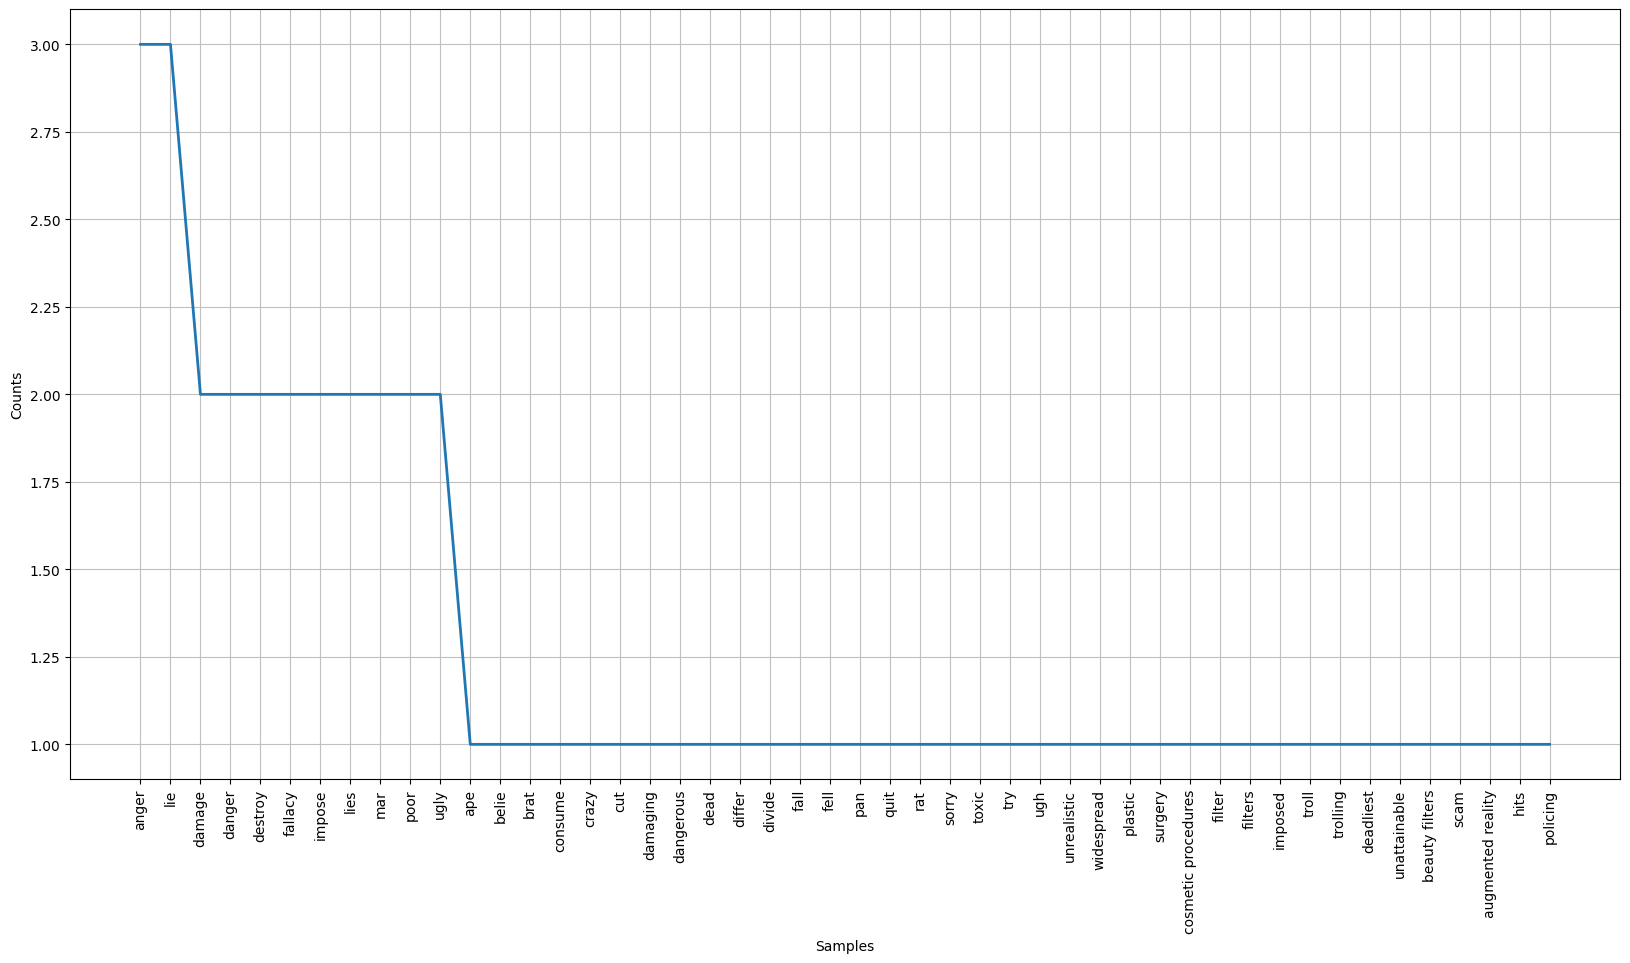

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
# Frequency distribution of negative words in title data
neg_fd = FreqDist(neg_words_title)
fig, ax = plt.subplots(figsize= (20,10))
neg_fd.plot(49)

Now I started working with the  main corpus, the main body of the article which are complied as text file. As a cleaning ritual this lengthy corpus must have go through the the pre processing phase as methods are discussed earlier. Length of my whole text is 248456 and after removing punctuation it becomes 241241 and after reducing stopwords it became 23418.

In [72]:
#punctuation
text = open("C:\\Users\\sukan\\Compsub\\Beauty_standards_corpus\\31_file.txt", encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
print(len(text))
print(len(cleaned_text))

248456
241241


After removing unhelphul stopwords the length of corpus reduces to 23418.

In [74]:
# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

23418


In [34]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
nlp = spacy.load('en_core_web_sm')
for word in final_words:
    word = nlp(word)
    lemma_words.append(word)

In my whole corpus 6325 unique words are found out of 23418 preprocessed words. I also calculated frequency distribution of most 50 common words- ('beauty', 347), ('women', 208), ('skin', 127), ('standards', 126), ('like', 125), ('look', 124), ('people', 109), ('body', 104), ('hair', 103), ('media', 82). Judging the result as we can see confirm the whole corpus is stressing upon 'women's 'beauty' 'standards', what they 'like' to 'look' in public life as well as 'social' 'media' life as shape of 'body', how 'hair' looks matter the most.

In [75]:
#Frequency distribution of corpus 
cor_fd = FreqDist(final_words)
print(cor_fd)
cor_fd.most_common(50)

<FreqDist with 6325 samples and 23418 outcomes>


[('beauty', 347),
 ('women', 208),
 ('skin', 127),
 ('standards', 126),
 ('like', 125),
 ('look', 124),
 ('people', 109),
 ('body', 104),
 ('hair', 103),
 ('one', 95),
 ('media', 82),
 ('–', 81),
 ('many', 80),
 ('also', 79),
 ('social', 79),
 ('products', 79),
 ('face', 77),
 ('korean', 77),
 ('filters', 72),
 ('says', 71),
 ('said', 71),
 ('time', 68),
 ('way', 66),
 ('use', 64),
 ('us', 63),
 ('south', 60),
 ('surgery', 58),
 ('—', 54),
 ('even', 53),
 ('eyes', 53),
 ('used', 51),
 ('would', 50),
 ('new', 50),
 ('world', 48),
 ('clean', 48),
 ('asian', 48),
 ('years', 47),
 ('make', 46),
 ('around', 46),
 ('culture', 46),
 ('industry', 46),
 ('young', 45),
 ('dont', 45),
 ('often', 43),
 ('fashion', 43),
 ('brands', 43),
 ('made', 42),
 ('makeup', 42),
 ('still', 41),
 ('think', 41)]

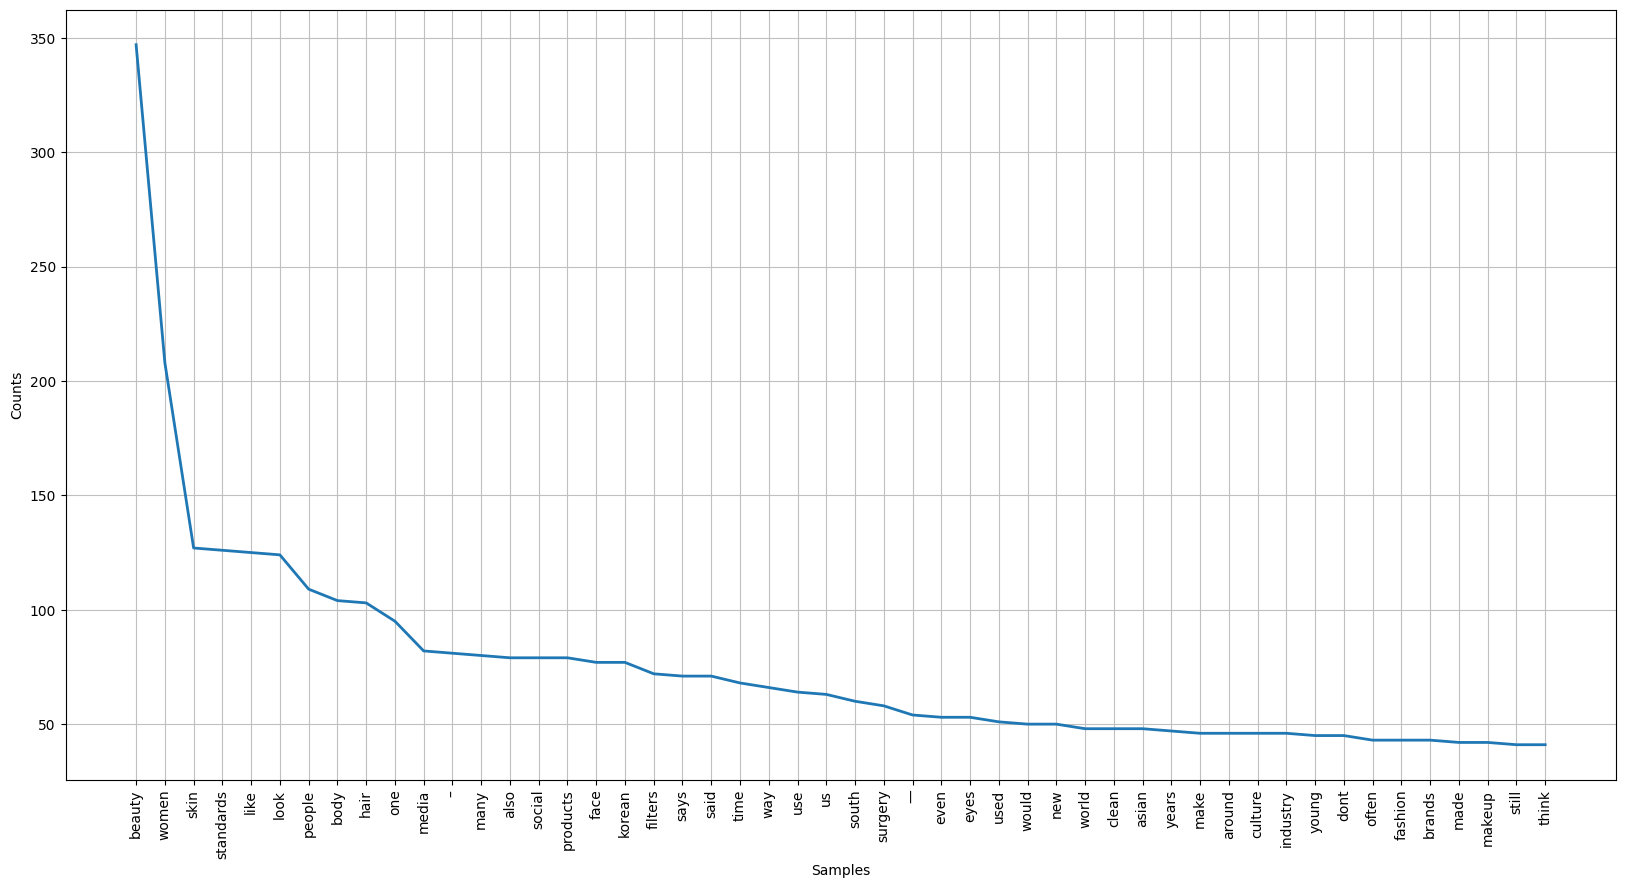

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
fig, ax = plt.subplots(figsize= (20,10))
cor_fd.plot(50)

In [41]:
import stylecloud
stylecloud.gen_stylecloud(file_path="C:\\Users\\sukan\\Compsub\\Beauty_standards_corpus\\31_file.txt", icon_name ="fas fa-square",size=(1024, 512))

In [78]:
final_words = ' '.join(final_words)

In [79]:
#Text blob
blob = TextBlob(final_words)
blob.sentiment

Sentiment(polarity=0.09520467951620723, subjectivity=0.45448763724838676)

In [80]:
blob = TextBlob(final_words, analyzer=NaiveBayesAnalyzer())
blob.sentiment 

Sentiment(classification='pos', p_pos=1.0, p_neg=0.0)

In [45]:
#VADER
analyzer = SentimentIntensityAnalyzer() 
vs = analyzer.polarity_scores(final_words)
print(vs)

{'neg': 0.085, 'neu': 0.711, 'pos': 0.204, 'compound': 1.0}


In [46]:
#Flair
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(final_words)
classifier.predict(sentence)
sentence.labels[0].score

2022-09-28 19:41:39,516 loading file C:\Users\sukan\.flair\models\sentiment-en-mix-distillbert_4.pt


0.9803270697593689

In [47]:
sentence.labels[0].value

'NEGATIVE'